# Interface area and number of atomic contacts vs number of screens

In [1]:
import numpy as np
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd

from custom_settings import *

%matplotlib inline

In [2]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7.0
mpl.rcParams['savefig.dpi'] = 500

In [3]:
df = pd.read_csv('../data/processed/Supplementary Table 11.txt', sep='\t')

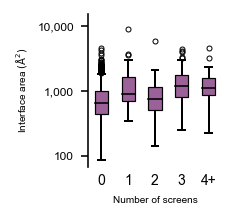

In [4]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1.2, 1.4)
data = ([df.loc[df['number_of_screens'] == i, 'interface_area'].values
         for i in range(0, 4)] +
         [df.loc[df['number_of_screens'] >= 4, 'interface_area'].values])
ax.boxplot(data,
           labels=[str(i) for i in range(0, 4)] + ['4+'],
           patch_artist=True,
           boxprops={'facecolor': HURI_COLOR, 'linewidth': 0.6},
           flierprops={'markersize': 2.5, 'markeredgewidth': 0.5},
           medianprops={'color': 'black', 'linewidth': 0.8})
ax.set_yscale('log')
ax.set_ylim(70, 15000)
yticks = [100, 1000, 10000]
ax.set_yticks(yticks)
ax.set_yticks([], minor=True)
ax.set_yticklabels(yticks, fontsize=6)
comma_fmt = mpl.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)))
ax.yaxis.set_major_formatter(comma_fmt)
ax.set_xlabel('Number of screens',
              fontsize=5)
ax.set_ylabel(r'Interface area $\mathrm{(\AA^2)}$',
              fontsize=5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
for fmt in FORMATS:
    plt.savefig('../figures/n_screens_vs_interface_area_box_plots' + fmt,
                bbox_inches='tight')

In [6]:
df.number_of_screens.value_counts()

0    770
2     64
1     59
3     57
4     26
5     13
6     11
7      3
9      1
Name: number_of_screens, dtype: int64

In [7]:
df.shape[0]

1004

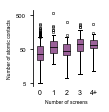

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1.2, 1.4)
data = ([df.loc[df['number_of_screens'] == i, 'number_of_contacts'].values
         for i in range(0, 4)] +
         [df.loc[df['number_of_screens'] >= 4, 'number_of_contacts'].values])
ax.boxplot(data,
           labels=[str(i) for i in range(0, 4)] + ['4+'],
           patch_artist=True,
           boxprops={'facecolor': HURI_COLOR, 'linewidth': 0.6},
           flierprops={'markersize': 2.5, 'markeredgewidth': 0.5},
           medianprops={'color': 'black', 'linewidth': 0.8})
ax.set_yscale('log')
ax.set_ylim(4, 700)
yticks = [5, 50, 500]
ax.set_yticks(yticks)
ax.set_yticks([], minor=True)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_xlabel('Number of screens',
              fontsize=5)
ax.set_ylabel('Number of atomic contacts',
              fontsize=5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
for fmt in FORMATS:
    plt.savefig('../figures/n_screens_vs_n_contacts_box_plots' + fmt,
                bbox_inches='tight')

In [7]:
xy = df.loc[df['number_of_screens'] > 0,
            ['number_of_screens', 'number_of_contacts']].values
x = xy[:, 0].copy()
y = xy[:, 1].copy()
rho, pval = stats.spearmanr(xy)
rand_rho = []
for __ in range(10000):
    rand_y = y.copy()
    np.random.shuffle(rand_y)
    rand_rho.append(stats.spearmanr(x, rand_y)[0])
pval_permuation = (len([_r for _r in rand_rho if _r >= rho]) / len(rand_rho)) * 2
print('rho: {:.2f}\np = {:.3f} (standard t-test on slope of ranks)\np = {:.3f} (permutation test)'.format(rho, pval, pval_permuation))

rho: 0.15
p = 0.025 (standard t-test on slope of ranks)
p = 0.031 (permutation test)


In [8]:
xy = df.loc[df['number_of_screens'] > 0,
            ['number_of_screens', 'interface_area']].values
x = xy[:, 0].copy()
y = xy[:, 1].copy()
rho, pval = stats.spearmanr(xy)
rand_rho = []
for __ in range(10000):
    rand_y = y.copy()
    np.random.shuffle(rand_y)
    rand_rho.append(stats.spearmanr(x, rand_y)[0])
pval_permuation = (len([_r for _r in rand_rho if _r >= rho]) / len(rand_rho)) * 2
print('rho: {:.2f}\np = {:.3f} (standard t-test on slope of ranks)\np = {:.3f} (permutation test)'.format(rho, pval, pval_permuation))

rho: 0.14
p = 0.039 (standard t-test on slope of ranks)
p = 0.040 (permutation test)
